EMAIL SPAM CLASSIFICATION <br>

Dataset from : https://www.kaggle.com/datasets/balaka18/email-spam-classification-dataset-csv

#Importing Data and doing basic operations, finding shape, sampling data etc.

In [152]:
import numpy as np
import pandas as pd

In [153]:
dataset = pd.read_csv('spam.csv',encoding = "ISO-8859-1")

In [154]:
dataset.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4132,spam,FreeMsg Today's the day if you are ready! I'm ...,NaN,NaN,NaN
911,ham,I am sorry it hurt you.,NaN,NaN,NaN
3669,ham,Ok thanx... Take care then...,NaN,NaN,NaN
1521,ham,Are you angry with me. What happen dear,NaN,NaN,NaN
2315,ham,That's significant but dont worry.,NaN,NaN,NaN


In [155]:
dataset.shape

(5572, 5)

#Step-1 Data Cleaning
-Process of preparing data for analysis by removing or modifying data that is incorrect, incomplete, irrelevant, duplicated, or improperly formatted.

In [156]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [157]:
'''It can be understood from the above analysis that columns 3,4 and 5 have very less non null values meaning
they are not very significant to our model, thus we will remove them.'''
dataset.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [158]:
#Renaming the columns to be more descreptive.
dataset.rename(columns = {'v1':'Class', 'v2' : 'Message'} , inplace = True)

In [159]:
dataset.sample(7)

,Class,Message
5220,ham,I have to take exam with in march 3
4385,ham,", im .. On the snowboarding trip. I was wonder..."
2075,ham,Must come later.. I normally bathe him in da a...
4374,spam,Ur TONEXS subscription has been renewed and yo...
1162,spam,Free entry in 2 a wkly comp to win FA Cup fina...
1627,spam,You have been selected to stay in 1 of 250 top...
3403,ham,Then Ì_ ask dad to pick Ì_ up lar... ÌÏ wan 2 ...


In [160]:
#Now we need to replace ham and spam values as 0 and 1, for better analysis, thus using sklearn.
#sklearn.preprocessing.LabelEncoder is used to Encode target labels with value between 0 and n_classes-1.
#fit_transform(y) is used to Fit label encoder and return encoded labels.
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
dataset['Class'] = encoder.fit_transform(dataset['Class'])
dataset.head()

,Class,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [161]:
#Check for null values, if any remove them
dataset.isnull().sum()

Class      0
Message    0
dtype: int64

In [162]:
#Check for duplicate values, if any remove them
dataset.duplicated().sum()

403

In [163]:
#Now that we know there are 403 duplicate values, we need to remove them.
dataset = dataset.drop_duplicates(keep='first')

In [164]:
dataset.duplicated().sum()

0

In [165]:
dataset.shape

(5169, 2)

#Step - 2 Exploratory Data Analysis
-To analyze and investigate data sets and summarize their main characteristics

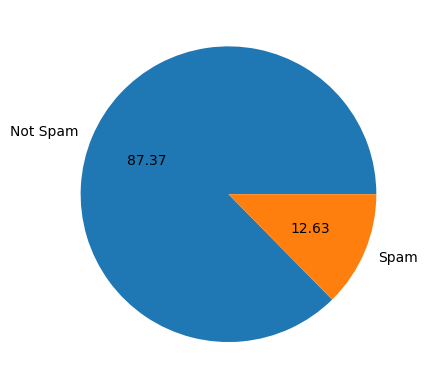

In [166]:
#Plotting a pie chart to understand the distribution of dataset i.e % of spam and not spam messages.
import matplotlib.pyplot as plt
plt.pie(dataset['Class'].value_counts(),labels = ["Not Spam","Spam"],autopct="%0.2f")
plt.show()

In [167]:
'''Now that we know that data is imbalanced, i.e spam is 12% and ham is 88%, we need to perform a deeper analysis of the data.
For that We will create more columns for the analysis i.e the no. of words, no. of characters and no. of sentences
and understand how their quantity varies in spam and not spam messages.'''
#For that we will use the natural language processing library nltk, vaailable in python
import nltk

In [195]:
#Installing dependencies for the library.
nltk.download('punkt')
nltk.download('all')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [169]:
#Creating new features from existing feautures, no.of word,characters and sentences.
dataset['Num_Of_Characters'] = dataset['Message'].apply(len)
dataset['Num_Of_Words'] = dataset['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
dataset['Num_Of_Sentences'] = dataset['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [170]:
dataset.head(7)

,Class,Message,Num_Of_Characters,Num_Of_Words,Num_Of_Sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
5,1,FreeMsg Hey there darling it's been 3 week's n...,148,39,4
6,0,Even my brother is not like to speak with me. ...,77,18,2


In [171]:
#Understanding the characteristics of ham messages.
dataset[dataset['Class'] == 0][['Num_Of_Characters','Num_Of_Words','Num_Of_Sentences']].describe()

,Num_Of_Characters,Num_Of_Words,Num_Of_Sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [172]:
#Understanding the characteristics of spam messages.
dataset[dataset['Class'] == 1][['Num_Of_Characters','Num_Of_Words','Num_Of_Sentences']].describe()

,Num_Of_Characters,Num_Of_Words,Num_Of_Sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


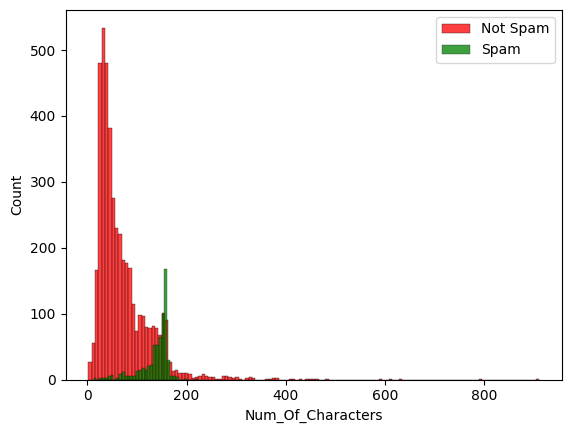

In [173]:
#Plotting a histogram for understanding the distribution of Spam and Ham messages.
import seaborn as sns
sns.histplot(data = dataset[dataset['Class'] == 0]['Num_Of_Characters'],color='Red')
sns.histplot(data = dataset[dataset['Class'] == 1]['Num_Of_Characters'],color='Green')
plt.legend(labels=["Not Spam", "Spam"])
plt.show()

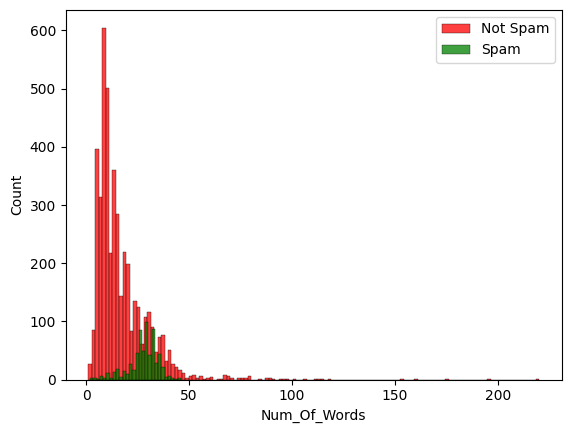

In [174]:
sns.histplot(data = dataset[dataset['Class'] == 0]['Num_Of_Words'],color='Red')
sns.histplot(data = dataset[dataset['Class'] == 1]['Num_Of_Words'],color='Green')
plt.legend(labels=["Not Spam", "Spam"])
plt.show()

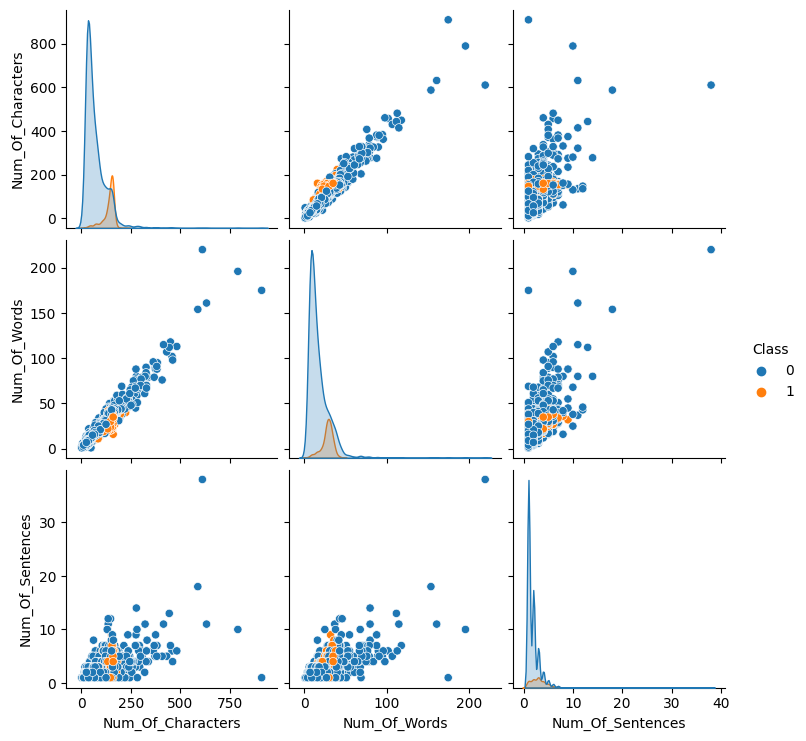

In [175]:
#Understanding the correlation between all these columns
sns.pairplot(dataset,hue="Class")

<ipython-input-176-067ae381510e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(),annot=True)


<Axes: >

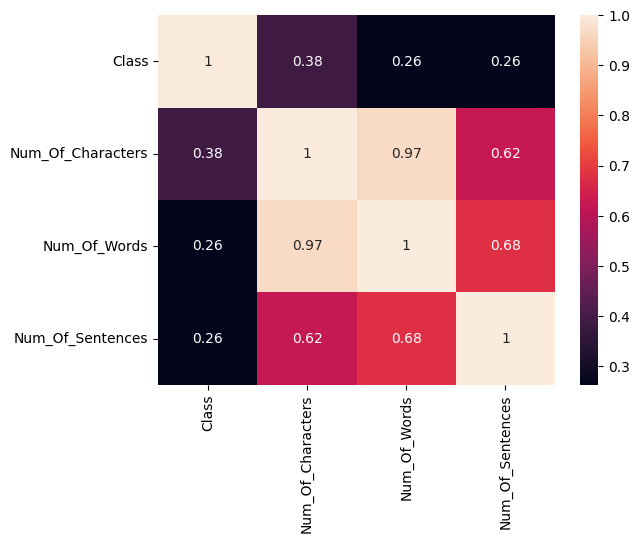

In [176]:
#Finding the Pearson Coefficient to better understand the above graphs and plotting it on a heatmap
sns.heatmap(dataset.corr(),annot=True)

It is understood from the heatmap that num of characters has a high correlation with a message being spam (0.38), and num of
characters also is highly correlated with num of words(0.97) and with num of senetences(0.68) , thus using all three columns would
not contribute to our model being efficient. Therefore, we will just use num of characters for our model building.

#Step - 3 Data Preprocessing
Steps involved are:


1.   Converting Data to Lower Case
2.   Tokenization - involves breaking down a text document into smaller units called tokens, which can be words, phrases, or individual characters
3. Removing Special Characters (!,@,% etc.)
4. Removing Stop Words (“the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc.) and punctuation marks(.,?, etc.)
5. Stemming - text preprocessing technique used in (NLP) to reduce words to their root or base form (eg: dancing,danced to dance)



In [177]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [178]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [179]:
#Function for Data Preprocessing (One Function that does all of these steps)

def preprocess_data(message):

  #Converting Data to Lower Case
  message = message.lower()

  #Tokenization
  message = nltk.word_tokenize(message)

  y = []
  #Removing Special Characters,Stop Words and Punctuation Marks
  for i in message:
    if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  message = y[:]
  y.clear()

  #Stemming
  ps = PorterStemmer()
  for i in message:
    y.append(ps.stem(i))

  return " ".join(y)

In [180]:
preprocess_data(dataset['Message'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [181]:
dataset['Transformed_Message'] = dataset['Message'].apply(preprocess_data)

In [182]:
dataset.head()

,Class,Message,Num_Of_Characters,Num_Of_Words,Num_Of_Sentences,Transformed_Message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Frequency of most commonly occuring words in both Spam And Ham Messages <br>
-Required to understand the interpritability of the model (These are not required to build the model, but to understand how the model would interpret the messages.)

In [183]:
from collections import Counter

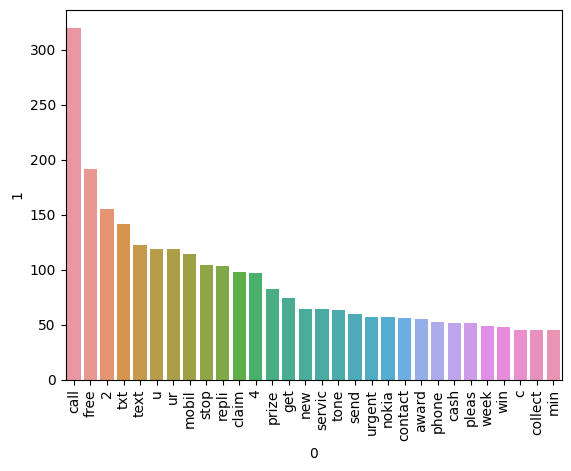

In [184]:
#Spam
spam_corpus = []
for msg in dataset[dataset['Class'] == 1]['Transformed_Message'].tolist():
  for word in msg.split():
    spam_corpus.append(word)
spam_dataframe = pd.DataFrame(Counter(spam_corpus).most_common(30))
sns.barplot(x=spam_dataframe[0],y=spam_dataframe[1])
plt.xticks(rotation = "vertical")
plt.show()

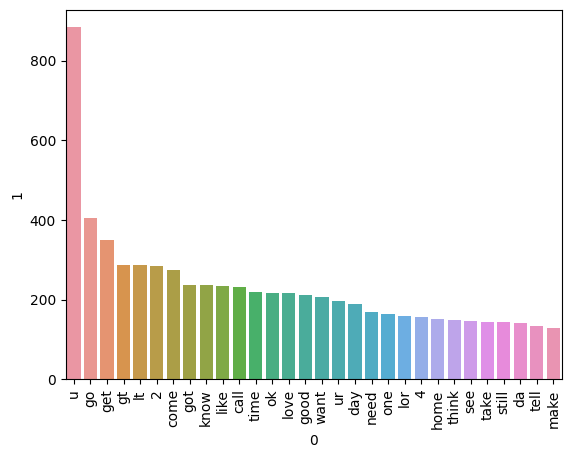

In [185]:
#Ham
ham_corpus = []
for msg in dataset[dataset['Class'] == 0]['Transformed_Message'].tolist():
  for word in msg.split():
    ham_corpus.append(word)
ham_dataframe = pd.DataFrame(Counter(ham_corpus).most_common(30))
sns.barplot(x=ham_dataframe[0],y=ham_dataframe[1])
plt.xticks(rotation = "vertical")
plt.show()

#Step - 4 Model Building
-Model used here would be Naive Bayes, as Naive Bayes gives the best result on textual data.
First data will be vectorised(the process of converting text data to numerical vectors), then model will be built on that data.

#Vectorization
-Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.
-Methods Available:


1.   Bag Of Words (CountVectorizer)
2.   TF - IDF
3. Word2Vec

For our Model, we have vectorised using TF_IDF
TF-IDF stands for Term Frequency Inverse Document Frequency of records. It can be defined as the calculation of how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)

In [186]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [187]:
X = vectorizer.fit_transform(dataset['Transformed_Message']).toarray()
Y = dataset['Class'].values

In [188]:
#Preparing the Train Test Split(The quantity of data used of training the model vs the quantity used for testing)
#Here we are using 20% of data for testing(taken randomly) and remaining for training
from sklearn.model_selection import train_test_split
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [189]:
#Building the model for various versions of Naive bayes, to Decide which ones the best fit for our Data
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

Fitting the Train Data on all three models, and finding the metrics for the decision as to which model should be used.

In [190]:
gnb.fit(X_Train,Y_Train)
predicted_Y = gnb.predict(X_Test)
print("Confusion Matrix of the model:")
print(confusion_matrix(Y_Test,predicted_Y))
print("Accuracy of the model:")
print(accuracy_score(Y_Test,predicted_Y))
print("Precision of the model:")
print(precision_score(Y_Test,predicted_Y))

Confusion Matrix of the model:
[[793 103]
 [ 25 113]]
Accuracy of the model:
0.8762088974854932
Precision of the model:
0.5231481481481481


In [191]:
mnb.fit(X_Train,Y_Train)
predicted_Y = mnb.predict(X_Test)
print("Confusion Matrix of the model:")
print(confusion_matrix(Y_Test,predicted_Y))
print("Accuracy of the model:")
print(accuracy_score(Y_Test,predicted_Y))
print("Precision of the model:")
print(precision_score(Y_Test,predicted_Y))

Confusion Matrix of the model:
[[896   0]
 [ 42  96]]
Accuracy of the model:
0.9593810444874274
Precision of the model:
1.0


In [192]:
bnb.fit(X_Train,Y_Train)
predicted_Y = bnb.predict(X_Test)
print("Confusion Matrix of the model:")
print(confusion_matrix(Y_Test,predicted_Y))
print("Accuracy of the model:")
print(accuracy_score(Y_Test,predicted_Y))
print("Precision of the model:")
print(precision_score(Y_Test,predicted_Y))

Confusion Matrix of the model:
[[893   3]
 [ 28 110]]
Accuracy of the model:
0.9700193423597679
Precision of the model:
0.9734513274336283


#Out of all three 3 models, Multinomial Naive Bayes with TF-IDF gives the best precision(1.0), thus that will be selected.

# Step - 5 Model Improvement


In [193]:
'''For this one thing done to improve the results is changes TF_IDF to take a limited number of features, this
improves the accuracy from 95% to 97%, making it the best suited model.'''
vectorizer = TfidfVectorizer(max_features=3000)

Note : Other Classification algorithms such as svc,knc,dtc,lrc,rfc,abc,bc,etc,
gbdt,xgb have been tested on the data as well as VotingClassifier and StackingClassifier has also been tested but the best results were given by Multinomial, thus that is chosen.

In [196]:
'''The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
“Pickling” is the process whereby a Python object hierarchy is converted into a byte stream'''
import pickle
pickle.dump(vectorizer,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))